# 2-Clustering-Kitap Türleri Kümeleme

<img src="book.jpg">

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",200)
import sqlite3
from sqlite3 import Error
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Elimizde mevcut veri olduğuna göre, kitap türlerini kümelemek için:

1. **Veri İncelemesi:** Mevcut verinizi gözden geçirin ve içeriğini anlayın. Hangi sütunların bulunduğunu, her bir sütunun veri türünü ve kitapların türlerini nasıl temsil ettiğini belirleyin.

2. **Veri Ön İşleme:** Veriyi temizleyin ve düzenleyin. Eksik verileri doldurun veya eksik veri içeren satırları kaldırın. Ayrıca, kitap türlerini sayısal bir formata dönüştürün veya one-hot encoding gibi kodlama yöntemleri kullanarak kategorik verileri sayısal hale getirin.

3. **Özellik Matriksi Oluşturma:** Kitapları temsil eden özelliklerin bir matrisini oluşturun. Bu özellikler, kitapların türleri hakkında bilgi içermelidir. Örneğin, kitabın içeriğini analiz ederek çıkarılan anahtar kelimeler veya kitabın yazarı gibi özellikler olabilir.

4. **Kümeleme Algoritması Seçimi:** Veriyi kümelemek için bir kümeleme algoritması seçin. K-Means, DBSCAN, Hierarchical Clustering, veya başka bir algoritma kullanabilirsiniz. Seçiminiz veri yapınıza ve gereksinimlerinize bağlı olacaktır.

5. **Kümeleme İşlemi:** Seçtiğiniz kümeleme algoritmasını kullanarak verilerinizi kümeleyin. Bu adımda, her bir kitabın hangi küme içinde olduğunu belirlemiş olacaksınız.

6. **Sonuçları İnceleme:** Kümeleme sonuçlarını görselleştirin ve analiz edin. Benzer kitap türlerinin aynı kümeye dahil edildiğini doğrulayın. Ayrıca, her kümenin kitap türleri açısından nasıl farklılık gösterdiğini de inceleyin.

7. **Sonuçları Değerlendirme:** Kümeleme sonuçlarına dayalı olarak hangi kitap türlerinin benzer olduğunu ve hangilerinin farklı olduğunu değerlendirin. Bu bilgiyi kitap öneri sistemleri oluşturmak veya veri analizi yapmak için kullanabilirsiniz.

8. **Modeli Ayarlama ve Validasyon:** Elde edilen sonuçları inceleyerek kümeleme modelinizi gerektiğinde ayarlayın. Ayrıca, modelinizi doğrulamak ve performansını değerlendirmek için uygun metrikler kullanın.

Bu adımlar, elinizdeki verileri kullanarak kitap türlerini başarılı bir şekilde kümelemek için izlenebilecek genel bir yol haritasını temsil eder. Her aşama, verilerinize ve projenizin gereksinimlerine bağlı olarak özelleştirilebilir.

## 1. **Veri İncelemesi:**

In [2]:
df=pd.read_csv("Book_Dataset_1.csv")

In [3]:
df.head()

,Unnamed: 0,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
0,0,A Light in the Attic,Poetry,51.77,51.77,0.0,22,0,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...,3
1,1,Tipping the Velvet,Historical Fiction,53.74,53.74,0.0,20,0,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...,1
2,2,Soumission,Fiction,50.10,50.10,0.0,20,0,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...,1
3,3,Sharp Objects,Mystery,47.82,47.82,0.0,20,0,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...,4
4,4,Sapiens: A Brief History of Humankind,History,54.23,54.23,0.0,20,0,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...,5


**Title:** Kitabın başlığı.

**Category:** Kitabın kategorisi.

**Price:** Kitabın fiyatı.

**Price_After_Tax:** Vergi sonrası fiyat.

**Tax_amount:** Vergi miktarı.

**Availability:** Kitabın bulunabilirlik durumu.

**Number_of_reviews:** Kitaba yapılan yorumların sayısı.

**Book_Description:** Kitap açıklaması.

**Image_Link:** Kitabın resmi.

**Stars:** Kitaba verilen yıldız derecelendirmesi.

Bu veri çerçevesi üzerinde çeşitli analizler, görselleştirmeler veya kümeleme işlemleri yapabilirsiniz. Örneğin, kitapların kategorilerine göre gruplandırılması veya fiyat ve yıldız derecelendirmelerine göre analiz edilmesi gibi işlemler yapabilirsiniz. İhtiyacınıza ve projenize bağlı olarak daha spesifik analizler de gerçekleştirebilirsiniz.

In [4]:
df.describe()

,Unnamed: 0,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Stars
count,1000.000000,1000.00000,1000.00000,1000.0,1000.000000,1000.0,1000.000000
mean,499.500000,35.07035,35.07035,0.0,8.585000,0.0,2.923000
std,288.819436,14.44669,14.44669,0.0,5.654622,0.0,1.434967
min,0.000000,10.00000,10.00000,0.0,1.000000,0.0,1.000000
25%,249.750000,22.10750,22.10750,0.0,3.000000,0.0,2.000000
50%,499.500000,35.98000,35.98000,0.0,7.000000,0.0,3.000000
75%,749.250000,47.45750,47.45750,0.0,14.000000,0.0,4.000000
max,999.000000,59.99000,59.99000,0.0,22.000000,0.0,5.000000


In [5]:
df.corr()

,Unnamed: 0,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Stars
Unnamed: 0,1.000000,0.016563,0.016563,NaN,-0.978961,NaN,-0.014017
Price,0.016563,1.000000,1.000000,NaN,-0.010914,NaN,0.028166
Price_After_Tax,0.016563,1.000000,1.000000,NaN,-0.010914,NaN,0.028166
Tax_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avilability,-0.978961,-0.010914,-0.010914,NaN,1.000000,NaN,0.016166
Number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stars,-0.014017,0.028166,0.028166,NaN,0.016166,NaN,1.000000


In [6]:
df.shape

(1000, 11)

## 2. **Veri Ön İşleme:**

In [7]:
df.isnull().sum()

Unnamed: 0           0
Title                0
Category             0
Price                0
Price_After_Tax      0
Tax_amount           0
Avilability          0
Number_of_reviews    0
Book_Description     0
Image_Link           0
Stars                0
dtype: int64

In [8]:
df=df.dropna(axis=1, how="all")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Title              1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price              1000 non-null   float64
 4   Price_After_Tax    1000 non-null   float64
 5   Tax_amount         1000 non-null   float64
 6   Avilability        1000 non-null   int64  
 7   Number_of_reviews  1000 non-null   int64  
 8   Book_Description   1000 non-null   object 
 9   Image_Link         1000 non-null   object 
 10  Stars              1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [12]:
df['Fiyat'] = df['Fiyat'].round().astype(int)
df['Vergi Sonrası Fiyat'] = df['Vergi Sonrası Fiyat'].round().astype(int)
df['Vergi Miktarı'] = df['Vergi Miktarı'].round().astype(int)

Bu kod, sütunlardaki sayıları yuvarlar ve ardından int veri türüne çevirir, böylece ondalık kısmı korur. Ondalık sayılar yuvarlanarak tam sayıya dönüştürülür.

In [13]:
# İhtiyac olmayanları çıkaralım
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [14]:
df.drop(["Kitap Link", "Kitap Açıklaması"], axis=1, inplace=True)

In [11]:
dic = {
    'Title': 'Kitap Adı',
    'Category': 'Kategori',
    'Price': 'Fiyat',
    'Price_After_Tax': 'Vergi Sonrası Fiyat',
    'Tax_amount': 'Vergi Miktarı',
    'Availability': 'Bulunabilirlik',
    'Number_of_reviews': 'Yapılan İncelemelerin Sayısı',
    'Book_Description': 'Kitap Açıklaması',
    'Image_Link': 'Kitap Link',
    'Stars': 'Yıldız Derecesi'
}
df.rename(columns=dic, inplace=True)

In [15]:
df.sample(3)

,Kitap Adı,Kategori,Fiyat,Vergi Sonrası Fiyat,Vergi Miktarı,Avilability,Yapılan İncelemelerin Sayısı,Yıldız Derecesi
666,Needful Things,Horror,48,48,0,4,0,4
605,Tell Me Three Things,Young Adult,42,42,0,5,0,1
813,Life After Life,Default,26,26,0,3,0,2


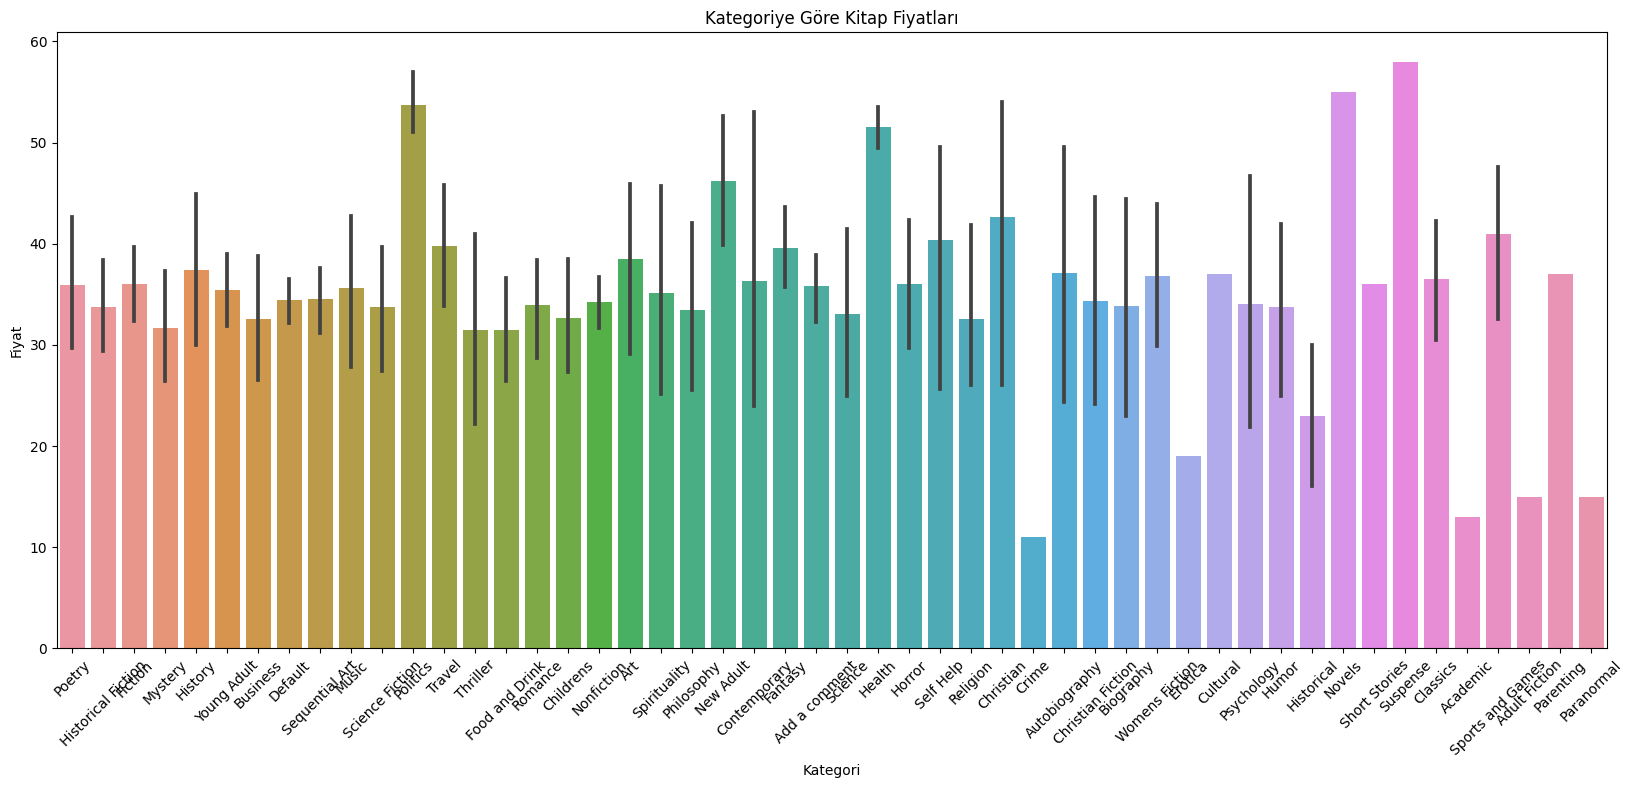

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
plt.title("Kategoriye Göre Kitap Fiyatları")

sns.barplot(x=df['Kategori'], y=df['Fiyat'])

plt.xticks(rotation=45)
plt.xlabel('Kategori')
plt.ylabel('Fiyat')

plt.show()

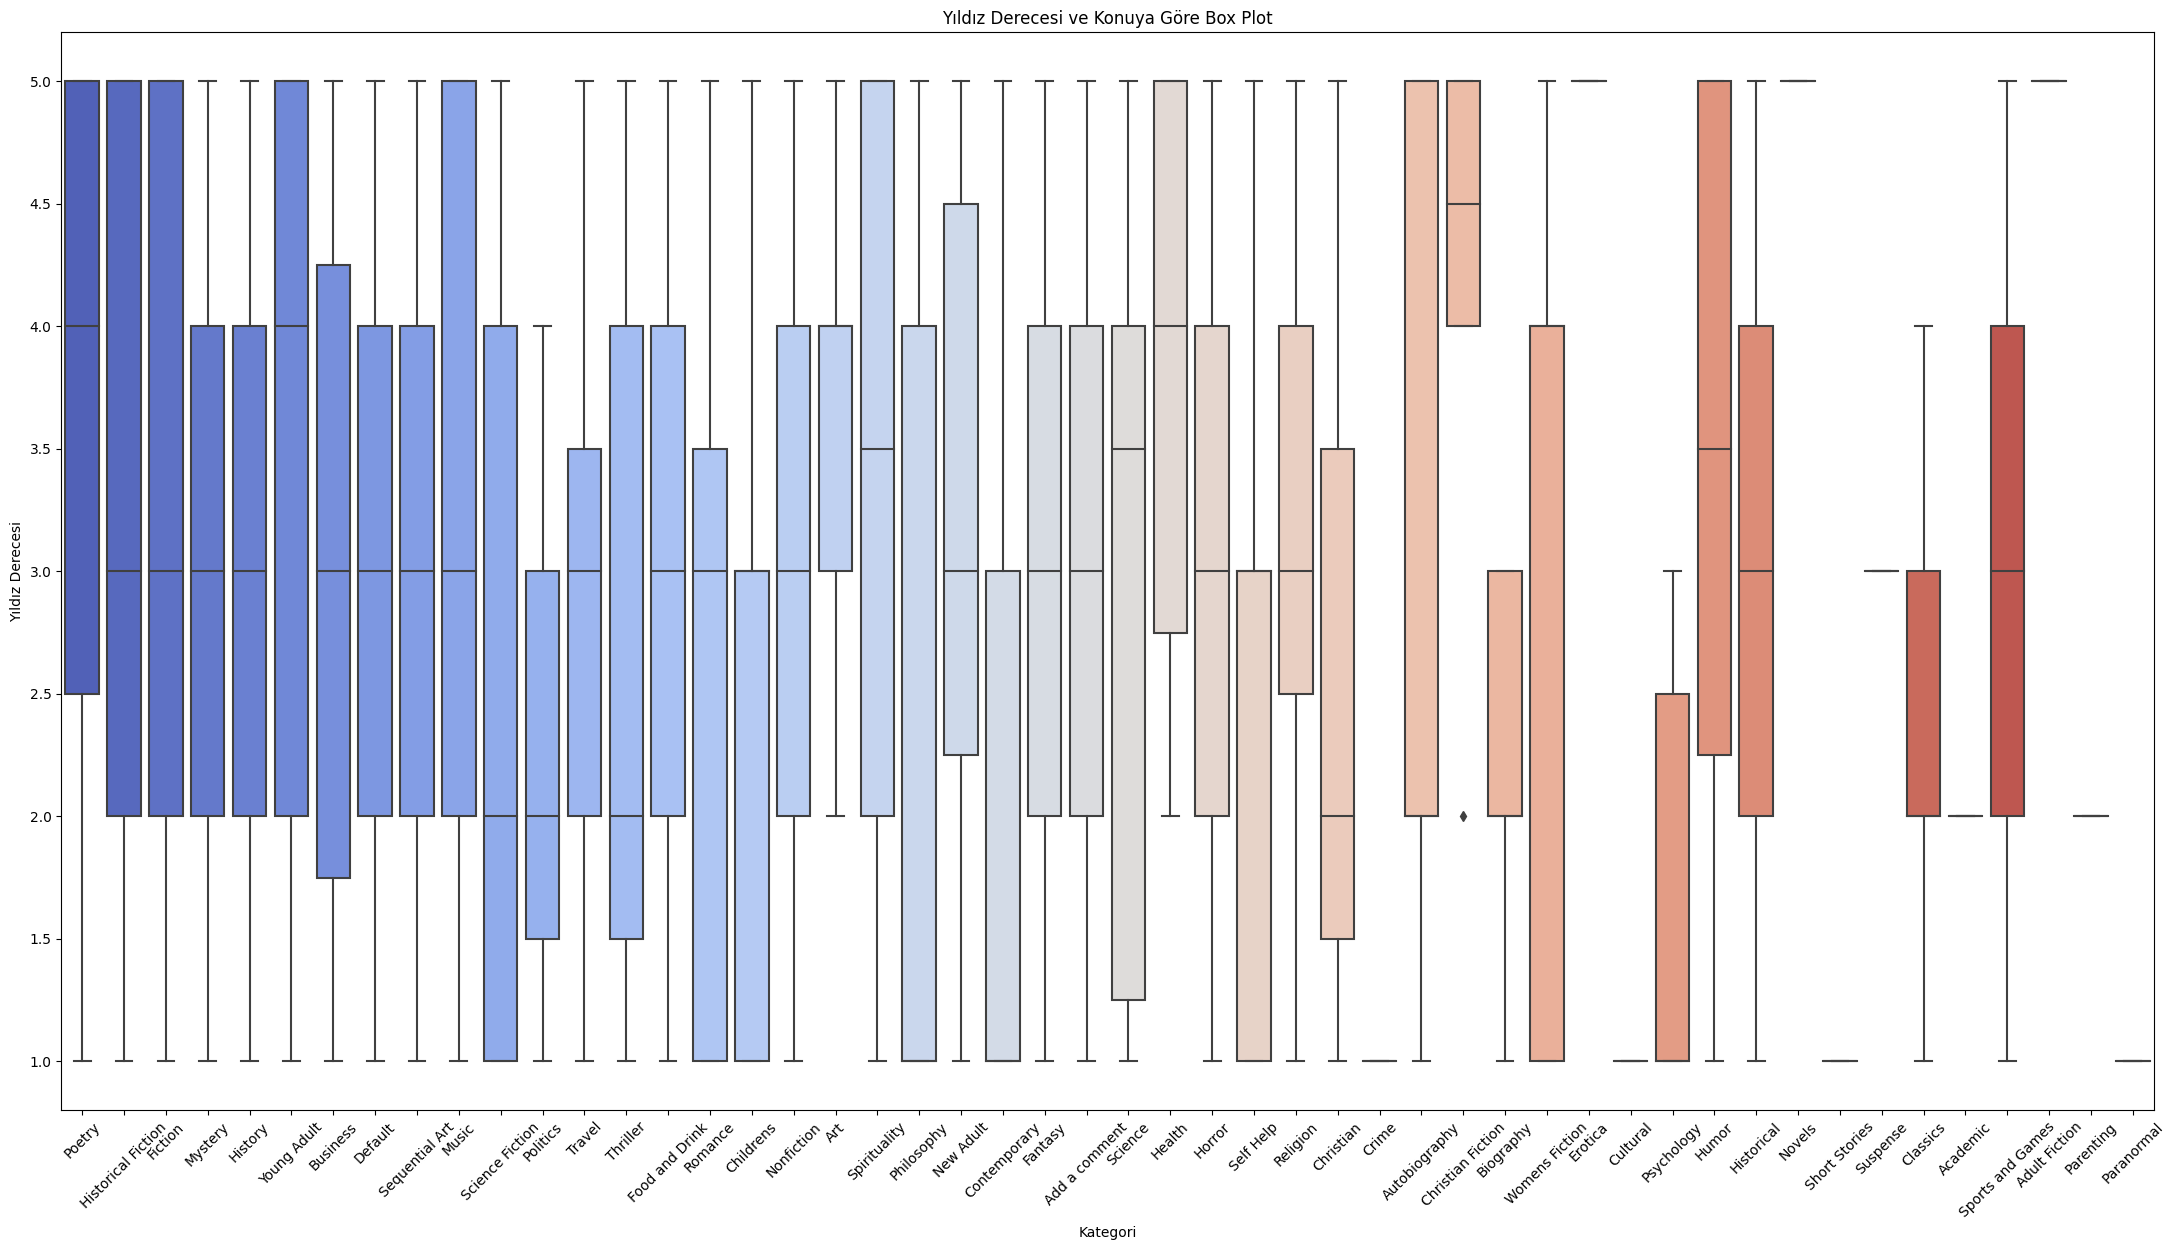

In [17]:
plt.figure(figsize=(27, 14))
plt.title("Yıldız Derecesi ve Konuya Göre Box Plot")

# Farklı renklerde box plot oluşturma
sns.boxplot(data=df, x='Kategori', y='Yıldız Derecesi', palette='coolwarm')

plt.xticks(rotation=45)
plt.xlabel('Kategori')
plt.ylabel('Yıldız Derecesi')
plt.show()

In [18]:
df.corr()['Yıldız Derecesi'].sort_values(ascending=False)

Yıldız Derecesi                 1.000000
Fiyat                           0.028336
Vergi Sonrası Fiyat             0.028336
Avilability                     0.016166
Vergi Miktarı                        NaN
Yapılan İncelemelerin Sayısı         NaN
Name: Yıldız Derecesi, dtype: float64

In [19]:
df['Yapılan İncelemelerin Sayısı'].fillna(0, inplace=True)

In [20]:
df['Vergi Miktarı'].fillna(0, inplace=True)

## Modelleme

In [21]:
x=df[["Yıldız Derecesi","Fiyat","Vergi Sonrası Fiyat","Avilability"]]

In [39]:
model=KMeans(4)

In [40]:
model=model.fit(x)

In [41]:
pred=model.predict(x)

In [42]:
pred

array([1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 3, 1, 2, 3, 1, 3, 0, 3,
       2, 2, 3, 1, 0, 1, 3, 3, 0, 2, 2, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 3, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 3, 3, 1, 3, 2, 0, 0,
       3, 1, 1, 1, 3, 0, 2, 3, 3, 3, 2, 1, 0, 1, 0, 0, 0, 3, 0, 0, 1, 3,
       0, 0, 2, 1, 0, 3, 3, 0, 3, 1, 3, 0, 1, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       3, 1, 3, 3, 0, 2, 2, 1, 3, 2, 2, 3, 1, 0, 1, 2, 1, 1, 0, 3, 0, 3,
       3, 1, 1, 1, 2, 3, 0, 0, 2, 2, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3,
       3, 3, 1, 0, 2, 3, 2, 3, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 3, 3, 0, 3,
       0, 3, 3, 2, 2, 0, 0, 0, 1, 0, 1, 3, 0, 1, 2, 0, 2, 1, 3, 1, 3, 3,
       3, 3, 0, 0, 1, 3, 2, 2, 0, 3, 0, 0, 3, 0, 3, 1, 0, 2, 3, 3, 0, 1,
       3, 0, 1, 0, 3, 3, 3, 0, 2, 2, 3, 1, 2, 2, 2, 1, 3, 3, 3, 1, 0, 2,
       0, 3, 2, 0, 1, 3, 1, 2, 0, 2, 1, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 3,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 1, 0, 1, 0, 0, 0, 3, 3, 2, 3, 2, 3, 3,
       1, 1, 1, 0, 2, 3, 2, 0, 0, 2, 2, 0, 0, 3, 2,

In [43]:
silhouette_score(x,pred)

0.40661038247359627

Sizin verdiğiniz değer olan 0.4066, Silhouette Score'un 0 ile 1 arasında olduğunu ve veri noktalarının iyi bir şekilde kümelenmiş olduğunu gösteriyor. Ancak, bu değer tam olarak ne anlama geldiğini değerlendirmek için, kümeleme modelinizin diğer metriklerle birlikte değerlendirilmesi gerekebilir. Silhouette Score, yalnızca bir bakış açısı sunar ve diğer metriklerle birlikte kullanılmalıdır.

In [44]:
x["cluster"]=pred

x["cluster"] = pred ifadesi, veri çerçevesi x içinde bir "cluster" (küme) sütunu oluşturarak bu sütuna tahmin edilen küme etiketlerini atayan bir işlemi ifade eder.

Bu ifade aşağıdaki şekilde açıklanabilir:

x: Bir veri çerçevesi veya veri tablosunu temsil eden değişkenin adıdır.
"cluster": Oluşturulacak sütunun adıdır. Bu ifade, bir "cluster" sütunu oluşturmayı amaçlar.
pred: Önceden hesaplanmış veya tahmin edilen küme etiketlerini içeren bir dizi veya veri serisidir.

In [45]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

Bu Python işlevi, belirli bir küme sayısı için K-Means kümeleme modelini oluşturur ve Silhouette Score'unu hesaplar. Ayrıca, her küme sayısı için hesaplanan Silhouette Score, küme sayısı ve modelin inertiası (uzaklıkların kare toplamı) gibi değerleri bir dizi içine kaydeder. İşte bu işlemin nasıl çalıştığına dair açıklamalar:

1. `allscore`, `allcluster` ve `distances` adında boş listeler oluşturulur. Bu listeler, her küme sayısı için hesaplanan değerleri saklamak için kullanılacaktır.

2. `clust` adında bir işlev tanımlanır ve bu işlev `kactane` adında bir parametre alır. Bu parametre, kaç farklı küme sayısını denemek istediğinizi belirler.

3. `for` döngüsü içinde, belirtilen küme sayısı için bir K-Means modeli oluşturulur ve eğitilir. Ardından, bu modele verileri tahmin ettirir.

4. `silhouette_score` işlevi, tahmin edilen küme etiketleri ve verileri kullanarak Silhouette Score'u hesaplar. Bu skor, her bir küme sayısı için hesaplanır ve `score` adında bir değişkende saklanır.

5. Ayrıca, her küme sayısı için modelin inertia değeri (`model.inertia_`) hesaplanır ve `distance` adında bir değişkende saklanır. Inertia, her bir veri noktasının küme merkezine olan uzaklıklarının karelerinin toplamını temsil eder.

6. Hesaplanan skor, küme sayısı ve inertia değeri, `allscore`, `allcluster` ve `distances` listelerine eklenir.

7. Son olarak, döngü tamamlandığında, her bir küme sayısı için hesaplanan Silhouette Score'ları, küme sayılarını ve uzaklık değerlerini ekrana basar.

Bu işlev, farklı küme sayıları için K-Means modelini değerlendirmenize ve en iyi küme sayısını belirlemenize yardımcı olur. Bu şekilde, veri kümeniz için en uygun küme sayısını seçebilirsiniz.

In [46]:
clust(10)

Cluster  2  score:  0.5604267364890007
Cluster  3  score:  0.46691295590263937
Cluster  4  score:  0.4093848400426071
Cluster  5  score:  0.35217595261866474
Cluster  6  score:  0.3629804282185723
Cluster  7  score:  0.36571876244123325
Cluster  8  score:  0.39676189351242086
Cluster  9  score:  0.4091758963982397
Cluster  10  score:  0.4063204129363948


Elde ettiğiniz Silhouette Score sonuçları, farklı küme sayıları için K-Means kümeleme modelinizin performansını değerlendirmek için kullanışlıdır. Silhouette Score, her bir küme sayısı için veri noktalarının kümelenme kalitesini ölçer. İşte sonuçların yorumu:

- Cluster 2: 0.5604 - Bu küme sayısı için yüksek bir Silhouette Score, veri noktalarının iyi bir şekilde kümelenmiş olduğunu gösterir.

- Cluster 3: 0.4669 - Üç küme için Silhouette Score, yine iyi bir kümelenme kalitesini gösterir, ancak 2 küme durumuna göre biraz daha düşüktür.

- Cluster 4: 0.4094 - Dört küme için Silhouette Score, veri noktalarının kümelenme kalitesinin düşmeye başladığını gösterir.

- Cluster 5, 6, 7: Silhouette Score değerleri giderek düşer. Bu, bu küme sayılarının daha zayıf kümelenme sonuçlarına sahip olduğunu gösterir.

- Cluster 8-10: Bu küme sayıları için Silhouette Score değerleri biraz daha yükselir, ancak yine de en yüksek skora ulaşmazlar.

Genel olarak, bu sonuçlar, küme sayısının 2 veya 3 olması durumunda en yüksek Silhouette Score'a sahip olduğunu gösteriyor. Bu nedenle, verilerinizi 2 veya 3 kümeye ayırmak, veri noktalarını en iyi şekilde kümelenmiş şekilde temsil edebilir. Ancak, hangi küme sayısının en iyi olduğunu seçmek, verilerinizin özgünlüğüne ve analiz amacınıza bağlı olabilir. Daha fazla ayrıntılı bir analiz ve iş gereksinimlerine dayalı olarak küme sayısını seçmek önemlidir.

## Yellow Brick Method

In [47]:
from yellowbrick.cluster import KElbowVisualizer

In [48]:
model=KMeans()

In [49]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

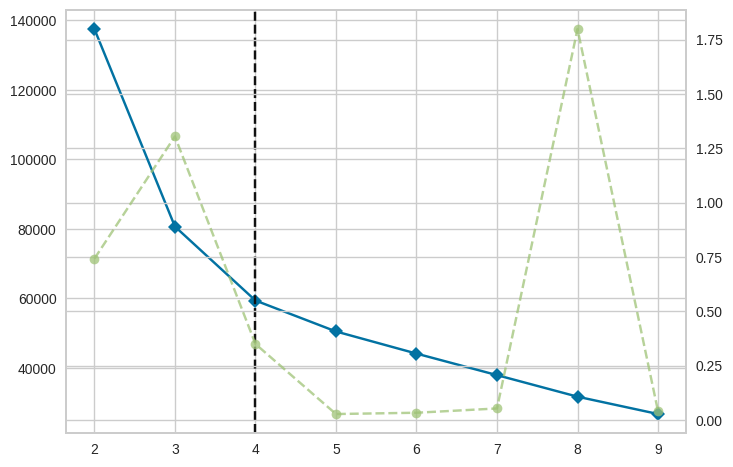

In [50]:
visualizer.fit(x)

In [51]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

## Sonuç Olarak:

Bu çalışma, kitapların kategorilerine göre kümelemesini yaparak farklı kitap türlerini tanımlamıştır. Silhouette Score analizi sonuçlarına göre, verilerin 2 veya 3 farklı küme içinde en iyi şekilde kümelenmiş olduğunu gözlemledik. Bu, kitapların benzerliklerini ve farklılıklarını daha iyi anlamamıza yardımcı olacaktır. Projenin sonucunda, kitap kategorilerine dayalı olarak farklı pazarlama stratejileri veya okuyucu segmentasyonu gibi uygulamalar için kullanışlı bilgiler elde edilmiştir.

## ***********************************************

# Kategoriyi get dummies yaparak modele verirsek

In [52]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [53]:
dfd = pd.get_dummies(df, columns=['Kategori'], prefix=['Kategori'])

In [61]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Fiyat                         1000 non-null   int64
 1   Avilability                   1000 non-null   int64
 2   Yapılan İncelemelerin Sayısı  1000 non-null   int64
 3   Yıldız Derecesi               1000 non-null   int64
 4   Kategori_Academic             1000 non-null   uint8
 5   Kategori_Add a comment        1000 non-null   uint8
 6   Kategori_Adult Fiction        1000 non-null   uint8
 7   Kategori_Art                  1000 non-null   uint8
 8   Kategori_Autobiography        1000 non-null   uint8
 9   Kategori_Biography            1000 non-null   uint8
 10  Kategori_Business             1000 non-null   uint8
 11  Kategori_Childrens            1000 non-null   uint8
 12  Kategori_Christian            1000 non-null   uint8
 13  Kategori_Christian Fiction    1000

In [60]:
dfd.drop(["Vergi Sonrası Fiyat", "Kitap Adı", "Vergi Miktarı"], axis=1, inplace=True)

In [57]:
import pandas as pd
from sklearn.cluster import KMeans

In [64]:
x = dfd[['Kategori_Academic', 'Kategori_Add a comment', 'Kategori_Adult Fiction', 'Kategori_Art',
        'Kategori_Autobiography', 'Kategori_Biography', 'Kategori_Business', 'Kategori_Childrens',
        'Kategori_Christian', 'Kategori_Christian Fiction', 'Kategori_Classics', 'Kategori_Contemporary',
        'Kategori_Crime', 'Kategori_Cultural', 'Kategori_Default', 'Kategori_Erotica', 'Kategori_Fantasy',
        'Kategori_Fiction', 'Kategori_Food and Drink', 'Kategori_Health', 'Kategori_Historical',
        'Kategori_Historical Fiction', 'Kategori_History', 'Kategori_Horror', 'Kategori_Humor',
        'Kategori_Music', 'Kategori_Mystery', 'Kategori_New Adult', 'Kategori_Nonfiction',
        'Kategori_Novels', 'Kategori_Paranormal', 'Kategori_Parenting', 'Kategori_Philosophy',
        'Kategori_Poetry', 'Kategori_Politics', 'Kategori_Psychology', 'Kategori_Religion',
        'Kategori_Romance', 'Kategori_Science', 'Kategori_Science Fiction', 'Kategori_Self Help',
        'Kategori_Sequential Art', 'Kategori_Short Stories', 'Kategori_Spirituality',
        'Kategori_Sports and Games', 'Kategori_Suspense', 'Kategori_Thriller', 'Kategori_Travel',
        'Kategori_Womens Fiction', 'Kategori_Young Adult']]

In [65]:
model=KMeans(4)

In [66]:
model=model.fit(x)

In [67]:
pred=model.predict(x)

In [68]:
pred

array([1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 3, 3, 1, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 0, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2, 1,

In [69]:
silhouette_score(x,pred)

0.326279720279715

In [70]:
x["cluster"]=pred

In [71]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [72]:
clust(10)

Cluster  2  score:  0.3831953113761065
Cluster  3  score:  0.39231727045296844
Cluster  4  score:  0.44990969510671575
Cluster  5  score:  0.4241487603305749
Cluster  6  score:  0.4929433962264112
Cluster  7  score:  0.543647058823526
Cluster  8  score:  0.5886915887850438
Cluster  9  score:  0.6222391857506336
Cluster  10  score:  0.6486010928961725
